# Lab 6

Alexander Chkodrov  
11/13/2019  

## Problem 1

Create a background Poisson distribution with mean 100.  
Determine where the 5$\sigma$ sensitivity threshold is

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [12]:
sigma = 5
thresh = stats.poisson.isf(stats.norm.sf(sigma), mu=100)
print(f"{sigma}𝜎 sensitivity threshold signal strength: {thresh:.1f}")

5𝜎 sensitivity threshold signal strength: 154.0


In [3]:
signal = 298
sigma = stats.norm.isf(stats.poisson.sf(signal, mu=100))
print(f"Signal strength {signal} has probability {sigma:.1f}𝜎")

Signal strength 298 has probability 16.0𝜎


## Problem 2

Create a simulated signal of a single strength of strength somewhere between 8𝜎 and 30𝜎. Insert it many times into the background data.

Histogram of how bright the observed signal appears to be,

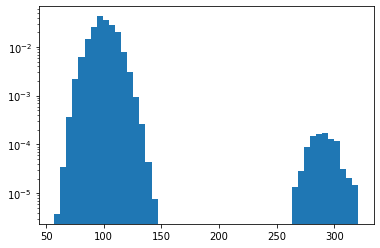

In [4]:
sigma = 8
bgd = np.zeros(100000)
sig = np.ones(500)*stats.poisson.isf(stats.norm.sf(sigma), mu=100)

data = np.append(bgd, sig) + stats.poisson.rvs(mu=100, size=100500)
plt.hist(data, bins=50, density=True)
plt.yscale('log')
plt.show()

This histogram has a remarkably gaussian shape on the left, following a parabolic line downward in the log plot which is characteristic of a gaussian distribution. It also has a similiar shape at 290 on the x axis, which would appear to be the signal is added to the background data. This histogram tells us there is some random background following a relatively gaussian distribution centered around the value 100, with a signal when x = 190.

The observed signal is biased because it was added to the background data set before the random noise; the visible signal above is actually the 'observed signal' of averaging around 290, while the injected signal is 190. The observed signal is essentially the injected signal plus noise (average 100). It is symmetric.

## Problem 3

Make a suite of injected signals, starting at 0$\sigma$ and extending to 34$\sigma$.

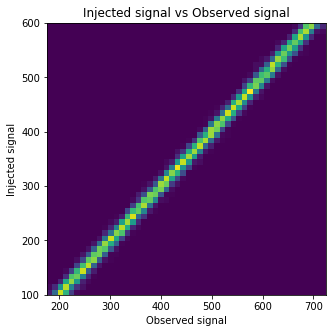

In [5]:
min_signal = 100 #0 sigma
max_signal = 600 #34 sigma

noise = stats.poisson.rvs(mu=100, size=10000)
injected = np.linspace(min_signal,max_signal,10000)
true_inj_mean = injected.mean()
observed = noise + injected

fig = plt.figure(figsize=(5,5))
h = plt.hist2d(observed, injected, bins=(50,50), density=True)
plt.title('Injected signal vs Observed signal')
plt.ylabel('Injected signal')
plt.xlabel('Observed signal')
plt.show()

The above histogram represents the probability for any injected signal given an observed signal of strength x (x axis). There is a clear band of high probabilities following the line y = x - 100 where y is the strength of the injected signal of strength and x is the strenght of the observed signal.

Average value of Injected Signal Strength pdf: 198.0509
Std. Deviation of Injected Signal Strength pdf: 10.03993571642767


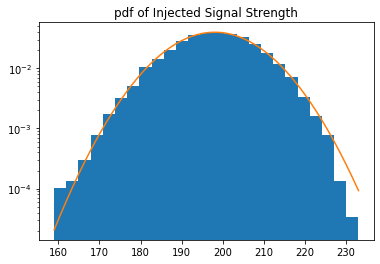

In [6]:
obs_sig=298 #16 sigma
noise = stats.poisson.rvs(mu=100, size=10000)
observed = np.ones(10000)*obs_sig
injected = observed - noise
avg_inj = injected.mean()
std_inj = injected.std()
print(f"Average value of Injected Signal Strength pdf: {avg_inj}")
print(f"Std. Deviation of Injected Signal Strength pdf: {std_inj}")
x_start = min(injected)
x_end = max(injected)

h = plt.hist(injected, bins=25, density=True)
x = np.linspace(h[1][0], h[1][-1], 10000)
plt.plot(x,stats.norm.pdf(x,loc=avg_inj,scale=std_inj))
plt.yscale('log')
plt.title('pdf of Injected Signal Strength')
plt.show()

For a given observed strength of 296 (16$\sigma$), the above histogram represents the probability of the underlying injected signal strength. The highest probability injected signal strength is just around 200, which is ~100 less than the observed signal strength, and also the average value of the noise. The most likely value for injected signal strength is the observed signal strength minus the average of the background noise.

The yellow line that follows the histogram is a normal distribution pdf with mean 197.86 and standard deviation of 10.06. Using this model for our injected signal strength, we find the 1𝜎 uncertainty on our injected signal strength.

In [7]:
upper = stats.norm.isf(stats.norm.sf(1), loc=avg_inj, scale=std_inj)
lower = stats.norm.isf(stats.norm.cdf(1), loc=avg_inj, scale=std_inj)
bound = upper-lower
print(f"1𝜎 certainty that injected signal is between {lower:.1f} and {upper:.1f}")
print(f"Or 1𝜎 certainty that injected signal is {avg_inj:.1f} +-{upper-avg_inj:.1f}")

1𝜎 certainty that injected signal is between 188.0 and 208.1
Or 1𝜎 certainty that injected signal is 198.1 +-10.0


In [9]:
sym = (avg_inj-lower) - (upper-avg_inj)
print(f"Difference between distance from avg to either bound: {sym}")
bias = abs(avg_inj - obs_sig) #inj_avg - (obs_sig-noise_avg)
print(f"bias of estimation: {bias:.1f}")

Difference between distance from avg to either bound: 0.0
bias of estimation: 99.9


The injected signal strength pdf is symmetric, based on the above difference and the gaussian model. There is a bias of the same magnitude as the average of the noise, as the injected signal is most probably the observed signal minus the mean of the noise.

## Problem 4
Using the same setup as in problem 3, now pick a relatively weak signal

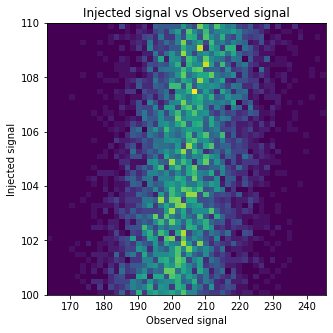

In [13]:
min_signal = 100 #0 sigma
max_signal = 110 #1 sigma

noise = stats.poisson.rvs(mu=100, size=10000)
injected = np.linspace(min_signal,max_signal,10000)
true_inj_mean = injected.mean()
observed = noise + injected

fig = plt.figure(figsize=(5,5))
h = plt.hist2d(observed, injected, bins=(50,50), density=True)
plt.title('Injected signal vs Observed signal')
plt.ylabel('Injected signal')
plt.xlabel('Observed signal')
plt.show()

Average value of Injected Signal Strength pdf: 9.8593
Std. Deviation of Injected Signal Strength pdf: 9.982519897801357


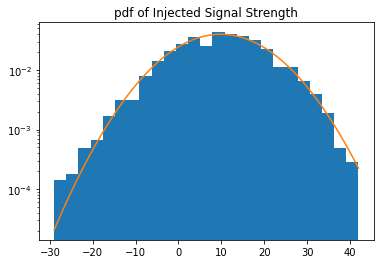

In [15]:
obs_sig=110 #1 sigma
noise = stats.poisson.rvs(mu=100, size=10000)
observed = np.ones(10000)*obs_sig
injected = observed - noise
avg_inj = injected.mean()
std_inj = injected.std()
print(f"Average value of Injected Signal Strength pdf: {avg_inj}")
print(f"Std. Deviation of Injected Signal Strength pdf: {std_inj}")
x_start = min(injected)
x_end = max(injected)

h = plt.hist(injected, bins=25, density=True)
x = np.linspace(h[1][0], h[1][-1], 10000)
plt.plot(x,stats.norm.pdf(x,loc=avg_inj,scale=std_inj))
plt.yscale('log')
plt.title('pdf of Injected Signal Strength')
plt.show()

According to the above pdf, there is some probability that there is no injected signal at all (signal is zero).

In [22]:
upper = stats.norm.isf(stats.norm.sf(2),loc=avg_inj,scale=std_inj)
print(f"95% Upper confidence bound for injected signal strength: {upper:.1f}")

95% Upper confidence bound for injected signal strength: 29.8


In [25]:
prob_exist = stats.norm.sf(0,loc=avg_inj,scale=std_inj)*100
print(f"Probability Injected signal exists: {prob_exist:.1f}%")

Probability Injected signal exists: 83.8%


There is a 95% chance based on the above data that the injected signal is less than 30, and a probability of 84% that the injected signal is greater than zero.